# Zaawansowane wizualizacje sygnału EKG

XD

In [105]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
filename = "z4data.pkl"

with open(filename, "rb") as f:
    data = pickle.load(f)

ecg = data['ECG_Clean']
watch = data['Watch_Clean']
ecg_full = data["ECG"]
watch_full = data["Watch"]
FS = data['fs']

print(ecg, len(ecg)) # okna ekg
print(watch, len(watch)) # dane z zegarka
print(FS) #  czestotliwosc probkowania

new_ecg = []
for i in range(len(ecg)):
    new_ecg.append(pd.DataFrame(data=ecg[i], columns = ['I', 'II', 'III', 'avR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']))
ecg = new_ecg



[[[ 8.16349012e+00  6.57258773e+00 -1.64109082e+00 ... -1.59284179e-01
    7.98438342e+00  5.73122413e+00]
  [ 6.90041002e+01  7.14308276e+01  1.42262150e+00 ...  1.66664741e+02
    9.09082744e+01  5.33766986e+01]
  [ 8.66463390e+01  7.66520816e+01 -1.12190737e+01 ...  2.00963487e+02
    1.01568735e+02  7.03010615e+01]
  ...
  [-2.69267927e+01 -8.90885790e+01 -6.12055470e+01 ... -4.65280546e+01
   -6.62417097e+01 -5.89823755e+01]
  [-5.46599546e+00 -8.52994538e+01 -7.97615484e+01 ... -3.59774714e+01
   -3.32567093e+01 -1.97756772e+01]
  [ 2.16180577e+01 -7.42100587e+01 -9.66602650e+01 ... -2.73707866e+01
   -2.31902546e+01 -2.59167817e+01]]

 [[-2.76898510e+02  2.03320630e+03  2.31276131e+03 ... -1.88631320e+02
    1.78721300e+02  1.84496018e+02]
  [-3.81787496e+02  1.27618184e+03  1.66226354e+03 ... -9.61754427e+02
   -3.82374726e+02 -1.36190968e+02]
  [-2.98468812e+02  2.39223659e+02  5.41375525e+02 ... -1.12788083e+03
   -6.07731163e+02 -2.83855827e+02]
  ...
  [ 3.19551233e+00 -1.3

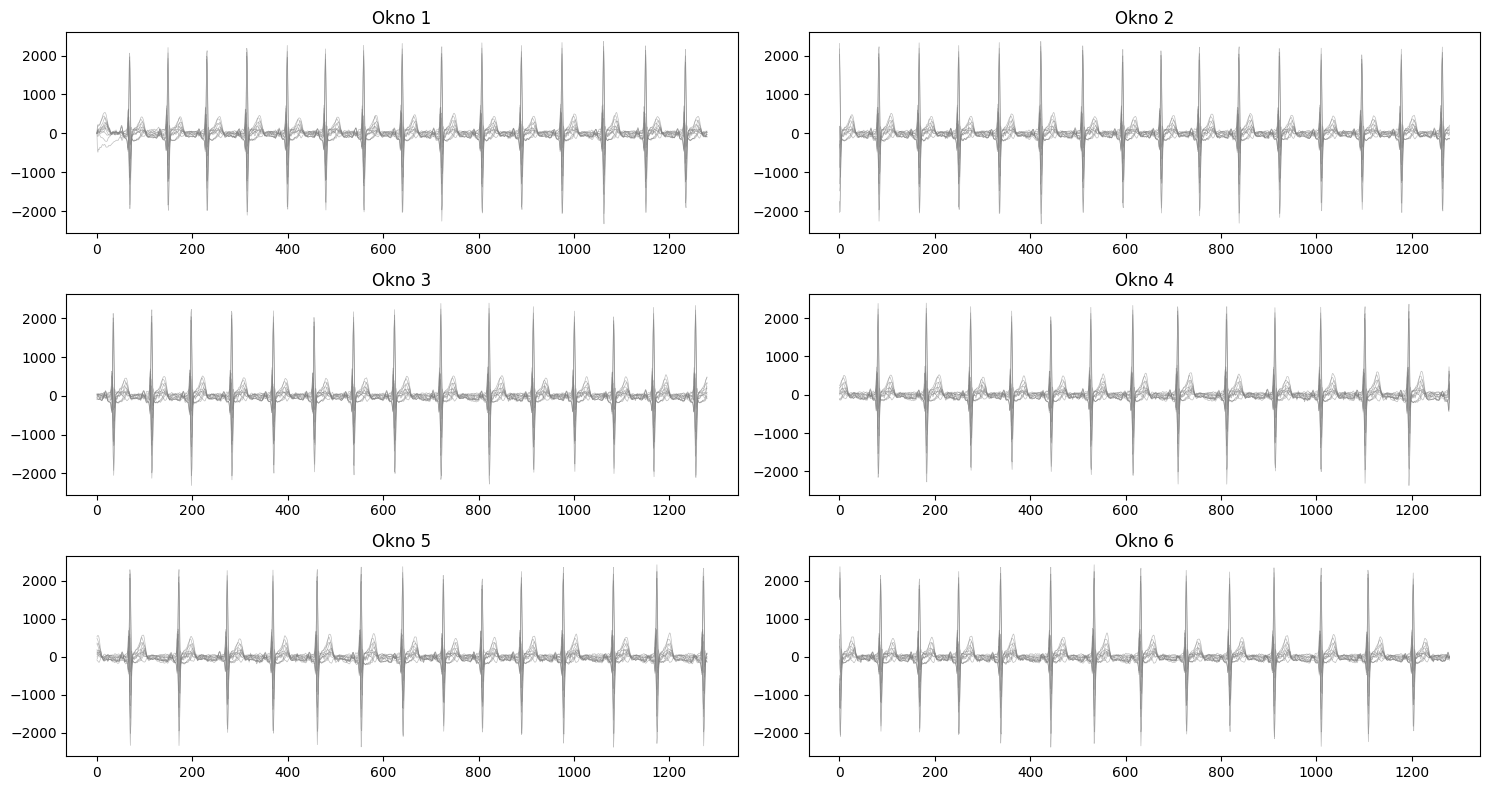

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 8))

for idx, window in enumerate(ecg[:6]):
    ax = axes.flatten()[idx]
    ax.plot(window, color='gray', alpha=0.5, linewidth=0.5)
    ax.set_title(f"Okno {idx + 1}")

plt.tight_layout()
plt.show()

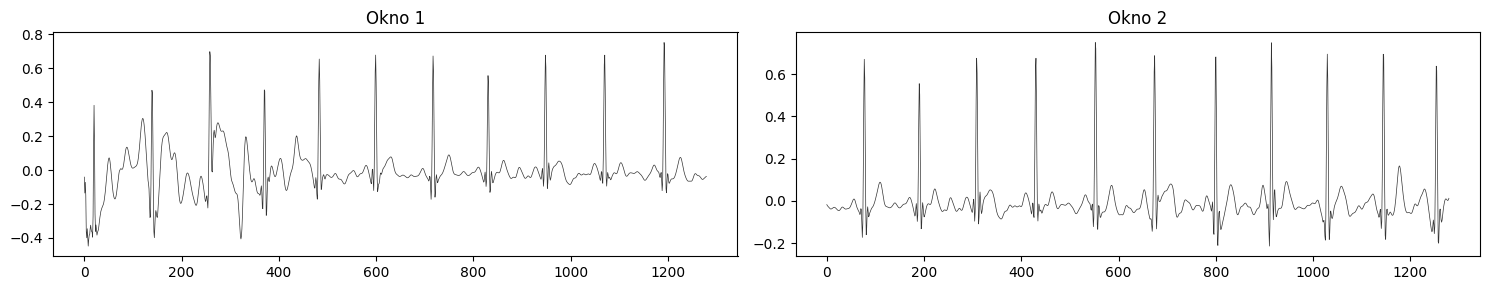

In [74]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

for idx, window in enumerate(watch):
    ax = axes.flatten()[idx]
    ax.plot(window, color='black', alpha=0.8, linewidth=0.5)
    ax.set_title(f"Okno {idx + 1}")


plt.tight_layout()
plt.show()

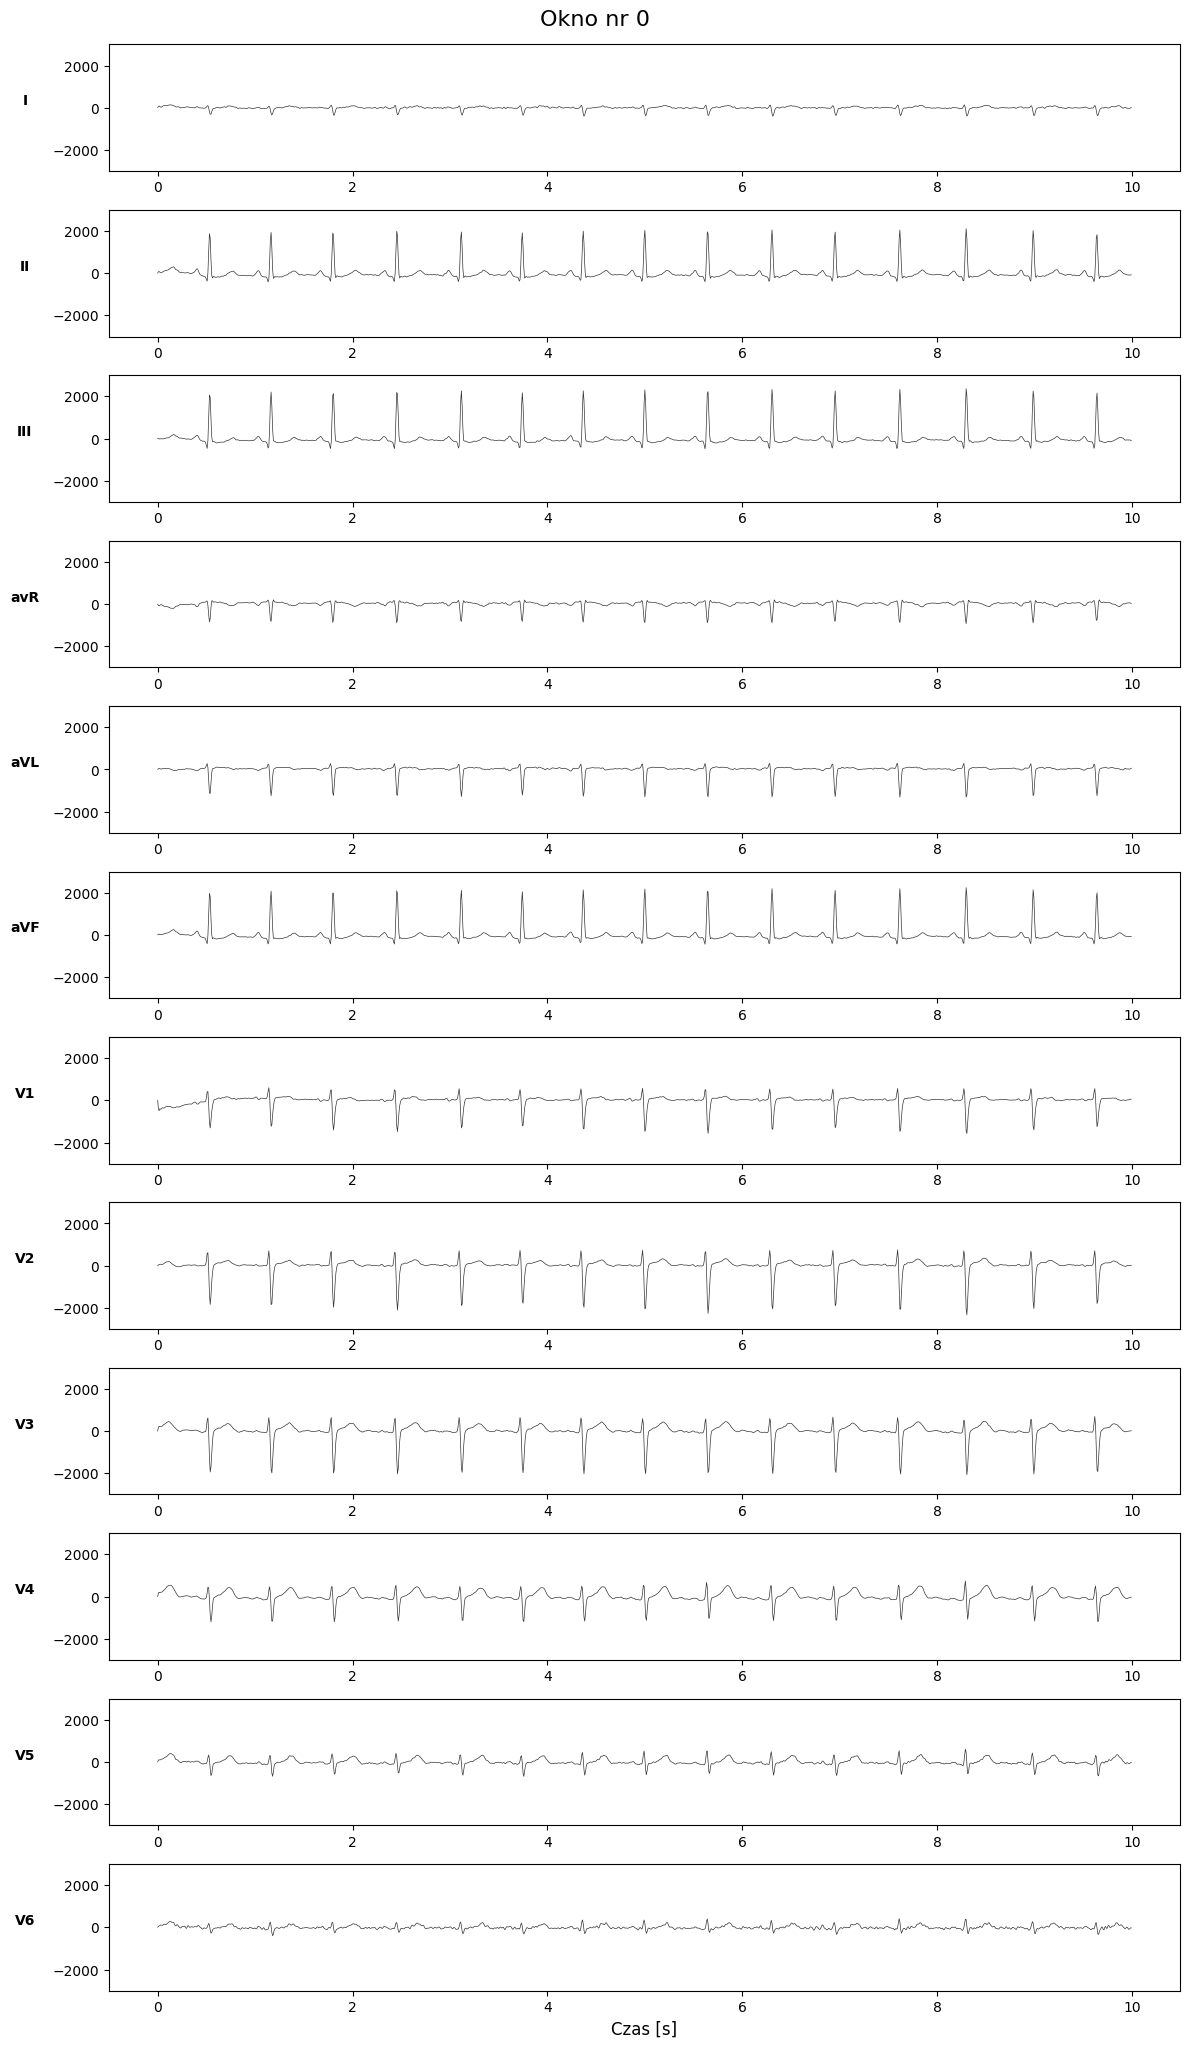

In [ ]:
channels = ['I', 'II', 'III', 'avR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']

first_window_index = 0

def show_window_channels(window_index, channels):
    window = ecg[window_index]
    size = len(channels)
    fig, axes = plt.subplots(nrows = size, ncols=1, figsize=(12, 20))
    time_axis = np.arange(window.shape[0]) / FS

    plt.setp(axes, ylim=(-3000, 3000))

    for idx, channel in enumerate(channels):
        signal = window.iloc[:, idx]
        ax = axes.flatten()[idx]
        ax.plot(time_axis, signal, color='black', alpha=0.8, linewidth=0.5)
        ax.set_ylabel(channel, rotation=0, labelpad=20, fontweight='bold')
    
    plt.tight_layout()
    plt.xlabel("Czas [s]", fontsize=12)
    plt.suptitle(f"Okno nr {window_index}", y=1.01, fontsize=16)
    plt.show()
    
show_window_channels(first_window_index, channels)

    

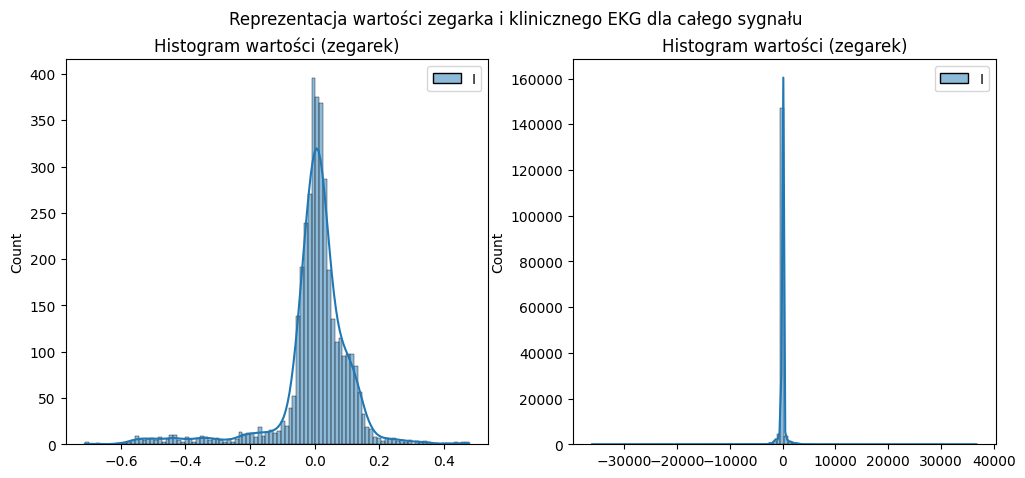

In [136]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
fig.suptitle("Reprezentacja wartości zegarka i klinicznego EKG dla całego sygnału", fontsize=12)

sns.histplot(watch_full, bins=100, kde=True, color='blue', ax=axes[0])
axes[0].set_title('Histogram wartości (zegarek)')

sns.histplot(ecg_full.iloc[:, [0]], bins=100, kde=True, color='blue', ax=axes[1])
axes[1].set_title('Histogram wartości (zegarek)')

plt.show()

UWAGA: Używam DANYCH WZORNIKOWYCH do demonstracji, ponieważ clean_df lub clean_df_watch nie są zdefiniowane.


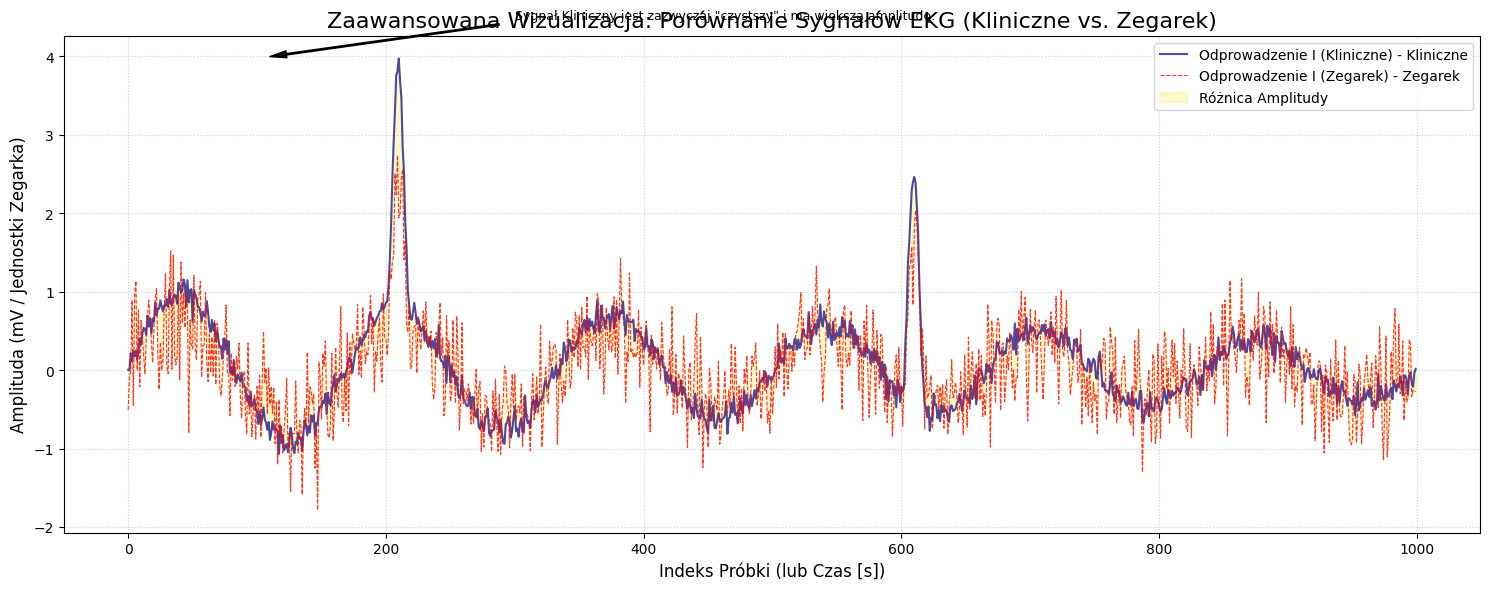

In [ ]:

try:
    # Zakładam, że clean_df i clean_df_watch są już wczytane
    # i clean_df ma co najmniej 1 kolumnę, a clean_df_watch ma 1 kolumnę.
    clinic_ecg = clean_df.iloc[:, 0]  # Odprowadzenie 1 (pierwsza kolumna)
    watch_ecg = clean_df_watch.iloc[:, 0] # Odprowadzenie z zegarka (pierwsza kolumna)
except NameError:
    print("UWAGA: Używam DANYCH WZORNIKOWYCH do demonstracji, ponieważ clean_df lub clean_df_watch nie są zdefiniowane.")
    # Tworzenie przykładowych danych dla demonstracji
    n_samples = 1000  # Liczba próbek
    t = np.linspace(0, 5, n_samples, endpoint=False) # Oś czasu
    
    # Symulacja sygnału EKG (sinusoida z szumem i 'pikiem' QRS)
    clinic_ecg = np.sin(2 * np.pi * 1.2 * t) * np.exp(-t/5) + 0.1 * np.random.randn(n_samples)
    clinic_ecg[200:220] += np.hanning(20) * 3 # Symulacja piku QRS
    clinic_ecg[600:620] += np.hanning(20) * 3
    
    # Symulacja sygnału z zegarka (często ma mniejszą amplitudę i jest głośniejszy/różny)
    watch_ecg = clinic_ecg * 0.7 + 0.4 * np.random.randn(n_samples)
    
    # Konwersja na Serie (jak w przypadku DataFrame.iloc[:, 0])
    clinic_ecg = pd.Series(clinic_ecg, name='Odprowadzenie I (Kliniczne)')
    watch_ecg = pd.Series(watch_ecg, name='Odprowadzenie I (Zegarek)')


# --- 2. Wyrównanie Długości Sygnałów ---
# W praktyce sygnały mogą mieć różną długość. Wyrównajmy je do krótszego.
min_len = min(len(clinic_ecg), len(watch_ecg))

clinic_ecg = clinic_ecg[:min_len]
watch_ecg = watch_ecg[:min_len]

# Oś X (może być czasem, jeśli znamy częstotliwość próbkowania)
x_axis = np.arange(min_len) # Indeksy próbek jako oś X

# --- 3. Wizualizacja ---

plt.figure(figsize=(15, 6))

# Wykres Klinicznego EKG - Jako Podstawa
plt.plot(x_axis, clinic_ecg, 
         label=f'{clinic_ecg.name} - Kliniczne', 
         color='darkblue', 
         linewidth=1.5,
         alpha=0.7)

# Wykres EKG z Zegarka - Naniesiony
# Zazwyczaj sygnał z zegarka jest skalowany (np. by pokazać różnice w amplitudzie)
# Pamiętaj, że offset i skalowanie mogą być konieczne w zależności od danych!
# W tym przykładzie, aby lepiej pokazać nałożenie, użyję innej stylistyki.
plt.plot(x_axis, watch_ecg, 
         label=f'{watch_ecg.name} - Zegarek', 
         color='red', 
         linestyle='--',
         linewidth=0.8,
         alpha=0.8)

# Dodanie Wypełnienia (opcjonalne, ale dodaje czytelności w zaawansowanej wizualizacji)
plt.fill_between(x_axis, clinic_ecg, watch_ecg, 
                 color='gold', 
                 alpha=0.2, 
                 label='Różnica Amplitudy')

# Ustawienia Wykresu
plt.title('Zaawansowana Wizualizacja: Porównanie Sygnałów EKG (Kliniczne vs. Zegarek)', fontsize=16)
plt.xlabel('Indeks Próbki (lub Czas [s])', fontsize=12)
plt.ylabel('Amplituda (mV / Jednostki Zegarka)', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, linestyle=':', alpha=0.6)

# Dodanie adnotacji (np. o różnicach)
plt.annotate('Sygnał Kliniczny jest zazwyczaj "czystszy" i ma większą amplitudę.', 
             xy=(x_axis[int(min_len*0.1)], clinic_ecg.max()), 
             xytext=(x_axis[int(min_len*0.3)], clinic_ecg.max() + 0.5),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5),
             fontsize=9)

plt.tight_layout()
plt.show()